# Part I - Ford Bike Dataset Explanatory
## By Rellika Kisyula

## Investigation Overview
For this analysis, I want to see how users utilize the bike sharing system. The main focus is on when the people ride the bikes in terms hours of the day. Is there a peak time during the day when people use the bikes? 

For this analysis, I would like to see the most popular starting points for bike rides.

Finally, would also like to explore the characteristics of the users who used the bike sharing system. I would like to understand when certain categories of users (gender, user type, and age) use the bike sharing system.

## Dataset Overview
The Ford GoBike dataset contains anonymized trip data for the bike-sharing system from June 2017 to April 2019. **However, I decided to only use the data in the year 2018 (January 2018 to December 2018).** The data includes information on individual bike rides such as trip duration, start and end time, start and end station, bike ID, and user type. Additionally, demographic data such as age, gender, and membership type is provided for some users.

I manually downloaded the datasets from the [System Data | Bay Wheels | Lyft](https://www.lyft.com/bikes/bay-wheels/system-data) page. The datasets were in the form of a zip file. I extracted the zip files and saved the csv files in the `data` folder as this notebook. The zip files are in `data/zip_files` folder.

## Preparation of Data
I then unzipped the files using `zipfile` and saved them in the `data/data_files` folder. I then read the csv files into a pandas dataframe and concatenated them into one dataframe. I then saved the dataframe as a csv file in the `data` folder as `bike_data.csv`. 

After performing the **wrangling processes**, **data preparation** such as adding new columns **filtering** the outlier age, I saved the dataframe as a csv file in the `data` folder as `part_II_bike_data.csv`. This is the dataset that I will use for the analysis.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [40]:
# Set the default color palette
base_color = sb.color_palette()[0]

### Load the specifically prepared dataset for this analysis. `part_II_bike_data.csv`

In [41]:
# Read the bike_data.csv file into a dataframe.
bike_data = pd.read_csv('data/part_II_bike_data.csv')

# If you get an error, make sure that you have run the code in the part I notebook.

In [42]:
bike_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,distance,member_age,month_of_year,day_of_week,hour,period_of_day,member_age_group
990184,1165,2018-07-25 18:05:47.149,2018-07-25 18:25:13.080,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,34.0,Father Alfred E Boeddeker Park,37.783988,...,1999.0,Male,No,2.041370,19.0,July,Wednesday,18,Night,0-20
1407549,348,2018-10-16 14:32:31.848,2018-10-16 14:38:19.869,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,266.0,Parker St at Fulton St,37.862464,...,1997.0,Male,Yes,0.882158,21.0,October,Tuesday,14,Afternoon,20-30
342768,252,2018-09-11 17:08:19.873,2018-09-11 17:12:32.774,356.0,Valencia St at Clinton Park,37.769188,-122.422285,120.0,Mission Dolores Park,37.761420,...,1983.0,Male,No,0.937612,35.0,September,Tuesday,17,Evening,30-40
1328980,310,2018-10-29 18:19:22.411,2018-10-29 18:24:33.170,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,74.0,Laguna St at Hayes St,37.776435,...,1989.0,Male,No,0.850887,29.0,October,Monday,18,Night,20-30
796426,687,2018-12-17 08:57:34.876,2018-12-17 09:09:02.871,73.0,Pierce St at Haight St,37.771793,-122.433708,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1987.0,Male,No,3.006199,31.0,December,Monday,8,Morning,30-40


## 1. Visualization: The rides in hours of the day
I would like to see the most popular hours of the day for bike rides. Moreover, I will group the hours of the day into 6 categories: **'Midnight'**, **'Early Morning'**, **'Morning'**, **'Afternoon'**, **'Evening'**, **'Night'** and **'Late Night'**. I will also see the distribution of the rides in hours of the day for each category of users.

In [43]:
# Plot the distribution of the `period_of_day` using a countplot
def rides_during_day_countplot(column, title, x_label, y_label='Count'):
    plt.figure(figsize=[20, 8])
    sb.countplot(data=bike_data, x=column, color=base_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

### The distribution of the rides in across the periods of the day
The distribution of the rides in across the periods of the day is shown in the bar chart below. The most popular period of the day for bike rides is the **'Morning'** and **Evening** period.

In [44]:
# Convert the `period_of_day` column to an ordered categorical type
# 'Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night' and 'Late Night'
ordered_days = ['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
period_of_day = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_days)
bike_data['period_of_day'] = bike_data['period_of_day'].astype(period_of_day)

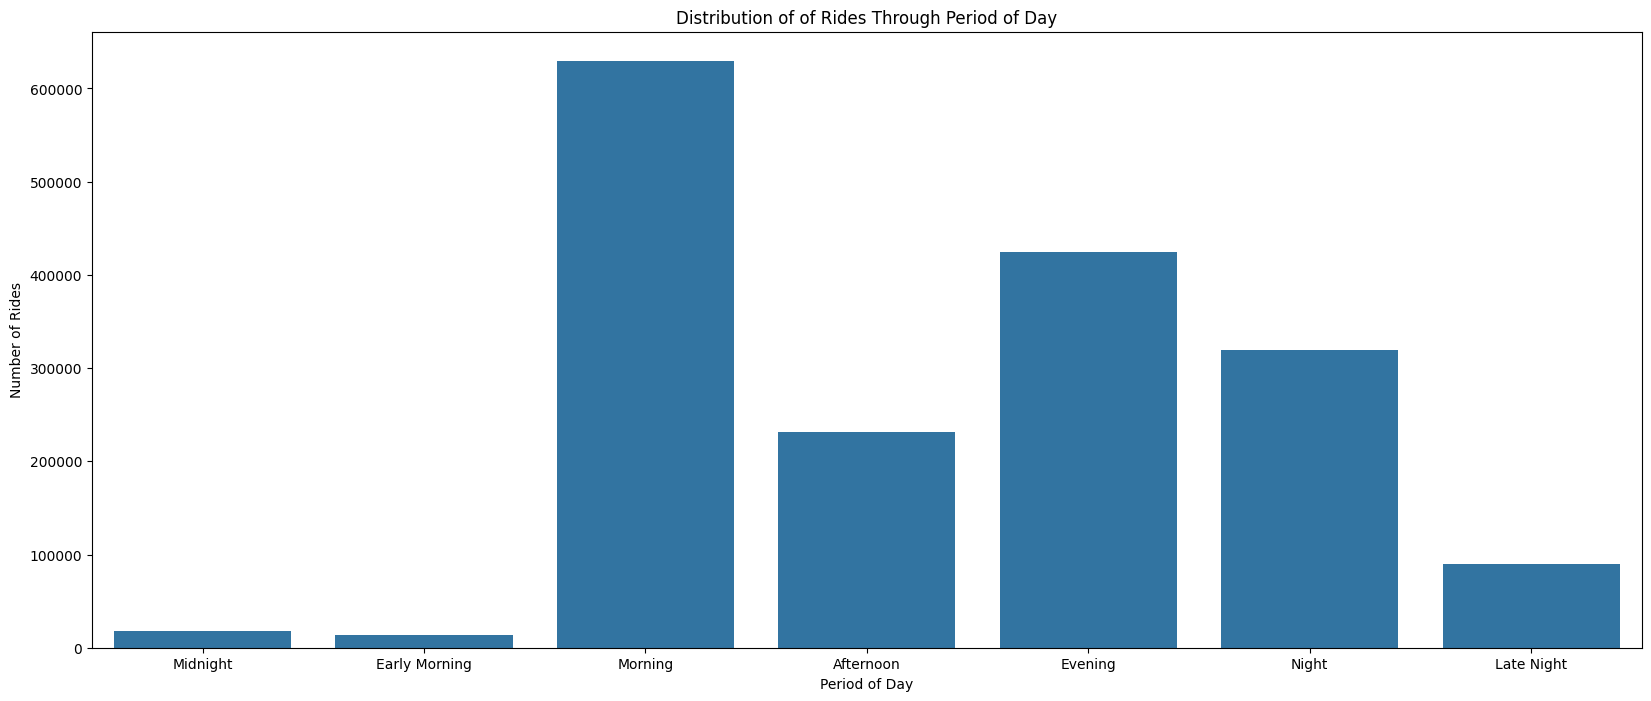

In [45]:
# Plot the distribution of the rides, in `period_of_day` using a countplot
rides_during_day_countplot('period_of_day', 'Distribution of of Rides Through Period of Day', 'Period of Day', 'Number of Rides')

### The distribution of the rides in across the hours of the day
The distribution of the rides in across the hours of the day is shown in the bar chart below. The most popular hour of the day for bike rides is **8:00 AM** and **5:00 PM**.

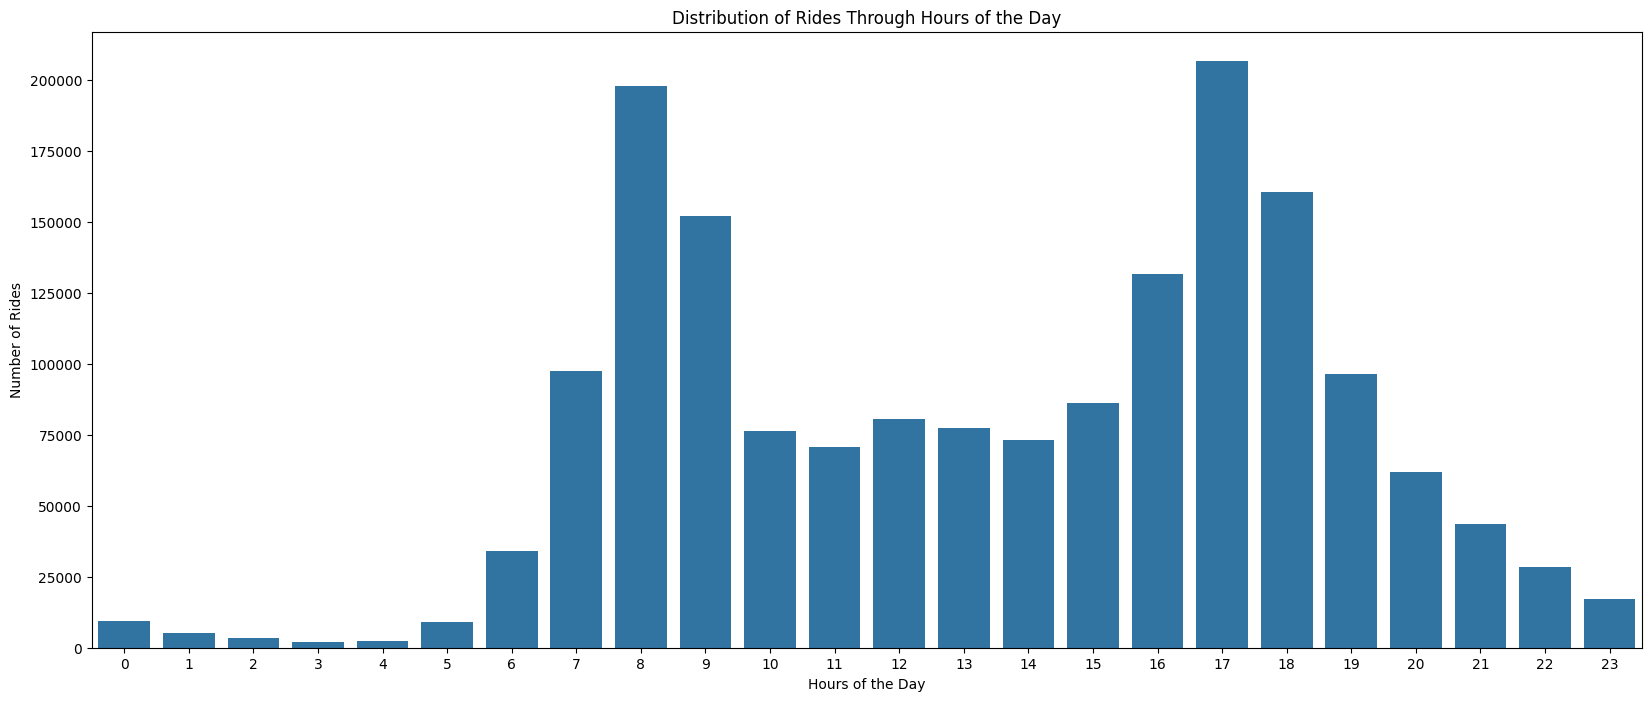

In [46]:
# Plot the distribution of the rides, in `hours` using a countplot
rides_during_day_countplot('hour', 'Distribution of Rides Through Hours of the Day', 'Hours of the Day', 'Number of Rides')

Based on the **graphs** depicted above, it is evident that the majority of bike rides are taken during peak morning and evening hours, with a significant decline observed during the 'Midnight' period. Specifically, the 'Morning' period, ranging from 6 to 11 AM, and the 'Evening' period have the highest number of bike rides, while the lowest number of rides is observed between 12 AM to 3 AM. These findings strongly suggest that the bike share system is primarily utilized for weekday commuting, most likely for work or school-related purposes, by individuals who prefer cycling over other modes of transportation. Furthermore, the bike sharing system's usage is highly concentrated at 8 AM and 5 PM, indicating that it caters to the peak commuting hours of its users.

## 2. Visualization: The top ten starting stations for bike rides
I would like to see the most popular starting stations for bike rides. I will select the top 10 starting stations for bike rides. I will also see the distribution of the rides category of the users such as type and gender who utilize these starting stations.

### What are the top 10 starting stations for bike rides?

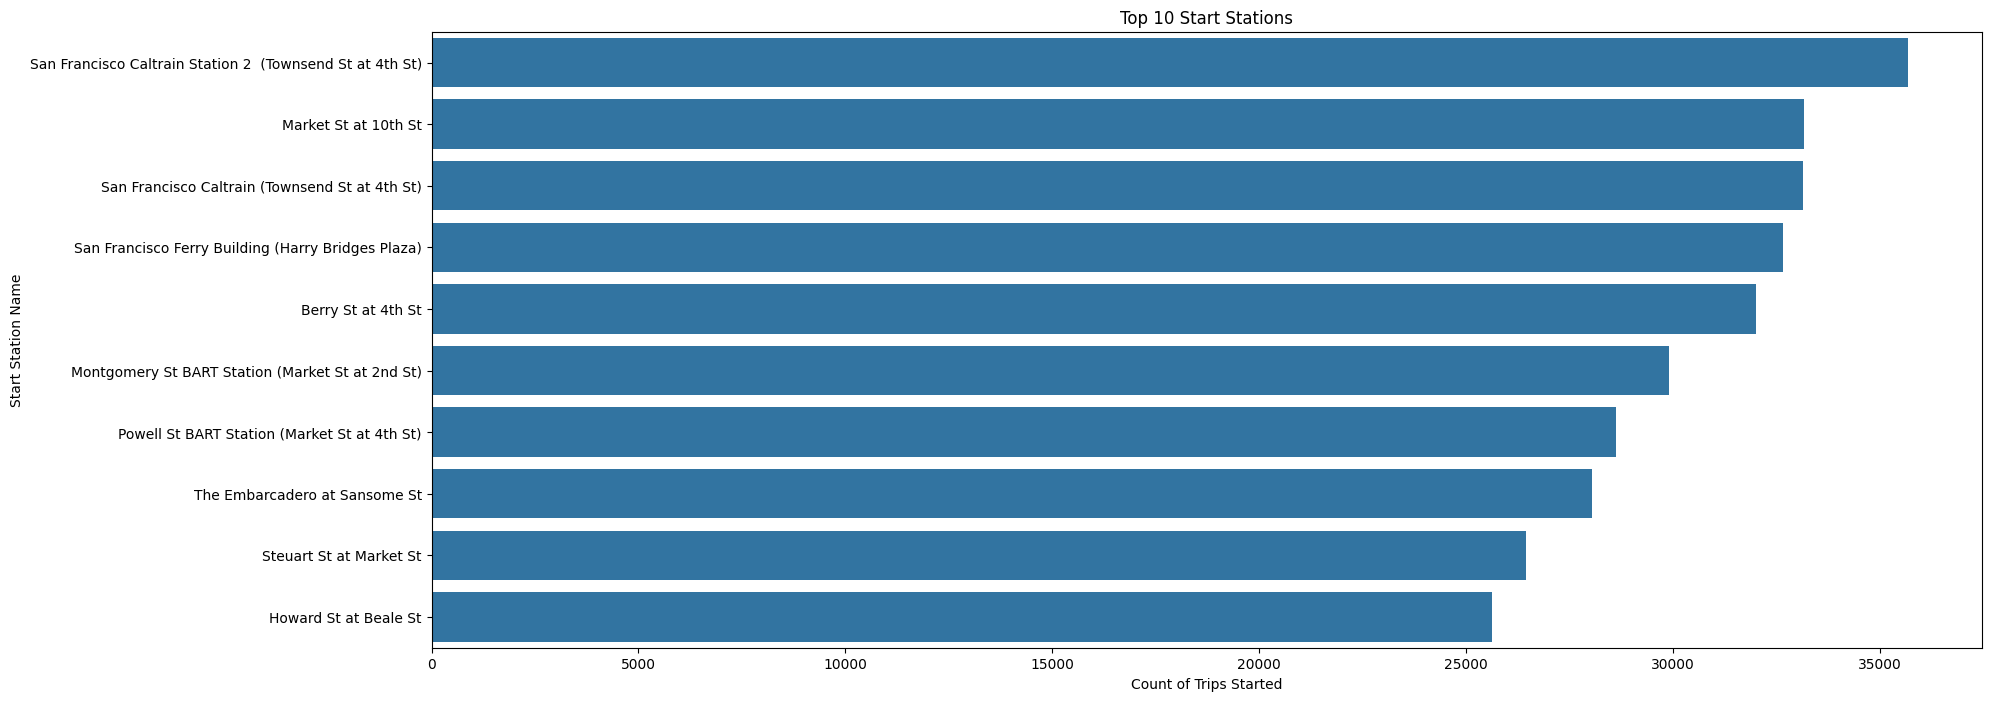

In [47]:
# plot the top 10 start stations
plt.figure(figsize=(20, 8))
sb.countplot(data=bike_data, y='start_station_name', order=bike_data.start_station_name.value_counts().head(10).index, color=base_color)
plt.title('Top 10 Start Stations')
plt.xlabel('Count of Trips Started')
plt.ylabel('Start Station Name');

We can see that the most popular starting points are **San Francisco Caltrain Station 2 (Townsend St at 4th St)**, **Market St at 10th St** and **San Francisco Caltrain (Townsend St at 4th St)**. These locations may be hubs for transportation, such as train and bus stations, making them convenient and easily accessible starting points for people commuting to work or other destinations.

In [48]:
def top_stations_data(title, hue, y_label='Start Station Name', x_label='Number of Bike Rides'):
    # Plot the top 10 stations with most number of bike rides
    plt.figure(figsize=[20, 8])
    sb.countplot(data=bike_data, y='start_station_name', hue=hue, order=bike_data.start_station_name.value_counts().iloc[:10].index)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Distribution of ' + title + ' Based on Start Station Name')
    plt.legend(title=title);

### What type of users use the most popular starting stations?
San Francisco Caltrain Station 2 (Townsend St at 4th St) is the most popular starting station for bike rides. I would like to see the distribution of the rides in terms of the type of users who use this station.

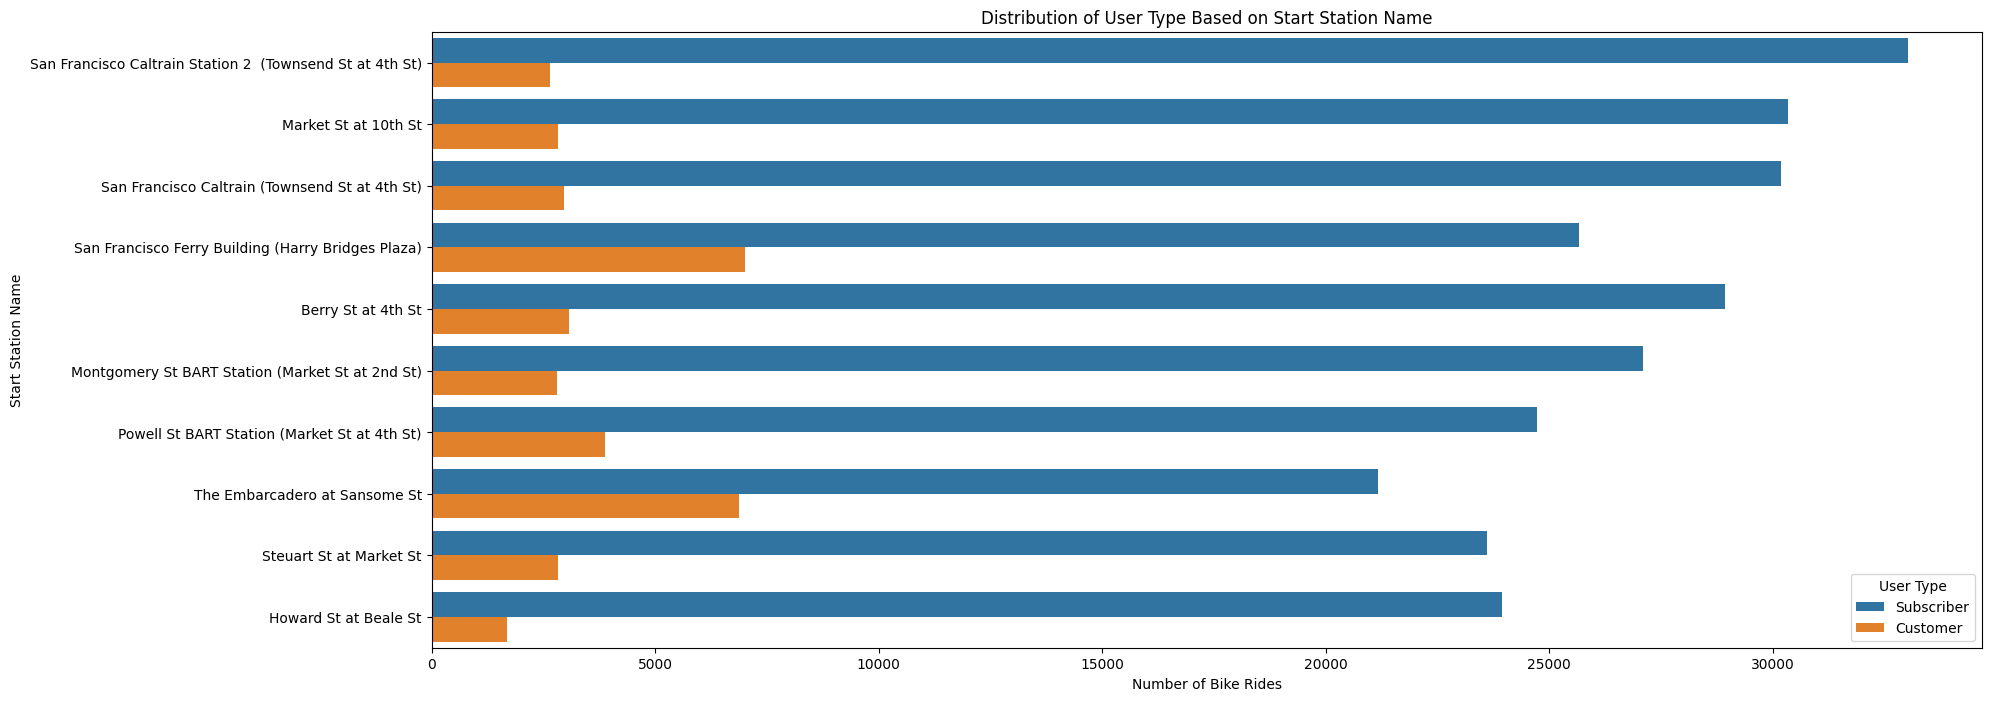

In [49]:
# clustered bar chart of `user_type` bike rides in the 10 most common `start_station_name`
top_stations_data('User Type', 'user_type')

We can see that the top 10 starting points are mostly used by **subscribers**. This is expected as **subscribers** are more likely to use the bike-sharing system for daily commuting. **Customers** are more likely to use the bike-sharing system for short-term or occasional trips. It is also important to not that there is a sharp increase in the number of rides for **customers** in San Francisco Ferry Building (Harry Bridges Plaza). This is probably because the Ferry Building is a popular tourist attraction in San Francisco. This phenomenon is also observed in The Embarcadero at Sansome St. However, the number of rides for **customers** in these stations is still lower than the number of rides for **subscribers**.

### What category of user gender uses the most popular starting stations?

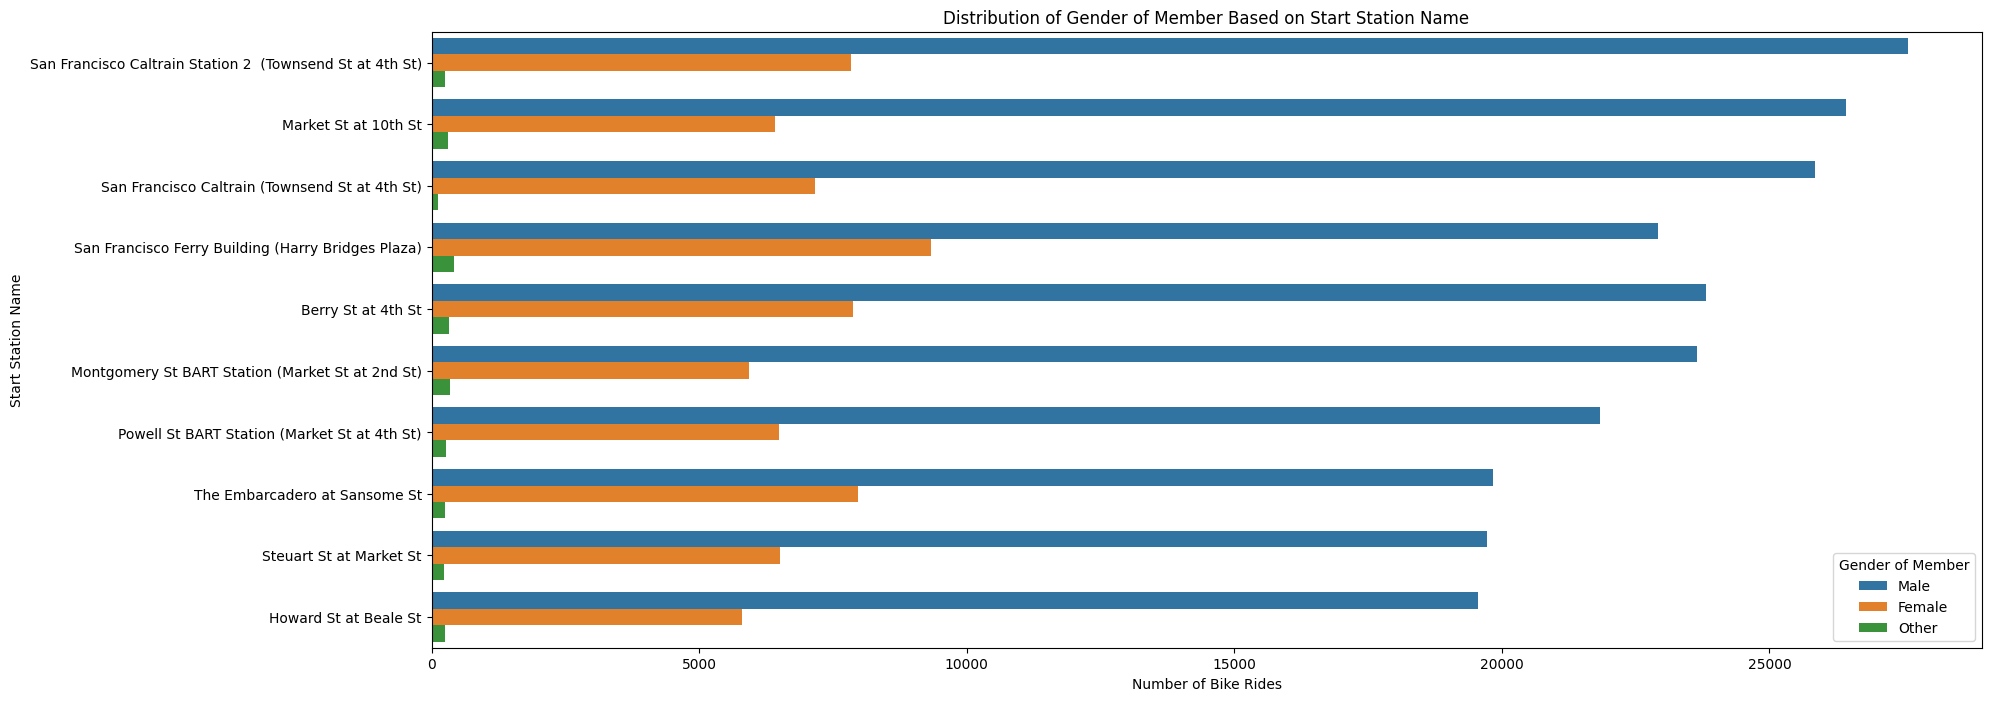

In [50]:
# clustered bar chart of `member_gender` bike rides in the 10 most common `start_station_name`
top_stations_data('Gender of Member', 'member_gender')

As we can see, the top 10 starting points, **males** are frequent riders departing these starting stations. It is possible that **males** are the primary users of the bike share system for commuting purposes, especially during peak hours. **Females** prefer stations such as San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St. This is probably because these stations are located in the city center and are popular tourist attractions. However, the number of **female** riders in these stations is still lower than the number of **male** riders.

## 3. Visualization: User demographics and bike rides
Here, I am interested in age, gender and user type of the users who use the bike sharing system. I will see the distribution of the rides in hours of the day for each category of users.

In [51]:
# convert the `member_age_group` column to ordered categorical type
ordered_age_group = ['0-20', '20-30', '30-40', '40-50', '50-60', '60 and above']
ordered_age_group = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_age_group)
bike_data['member_age_group'] = bike_data['member_age_group'].astype(ordered_age_group)

### The distribution of users across age groups
We can expect that the majority of users are between the ages of 20 and 40.

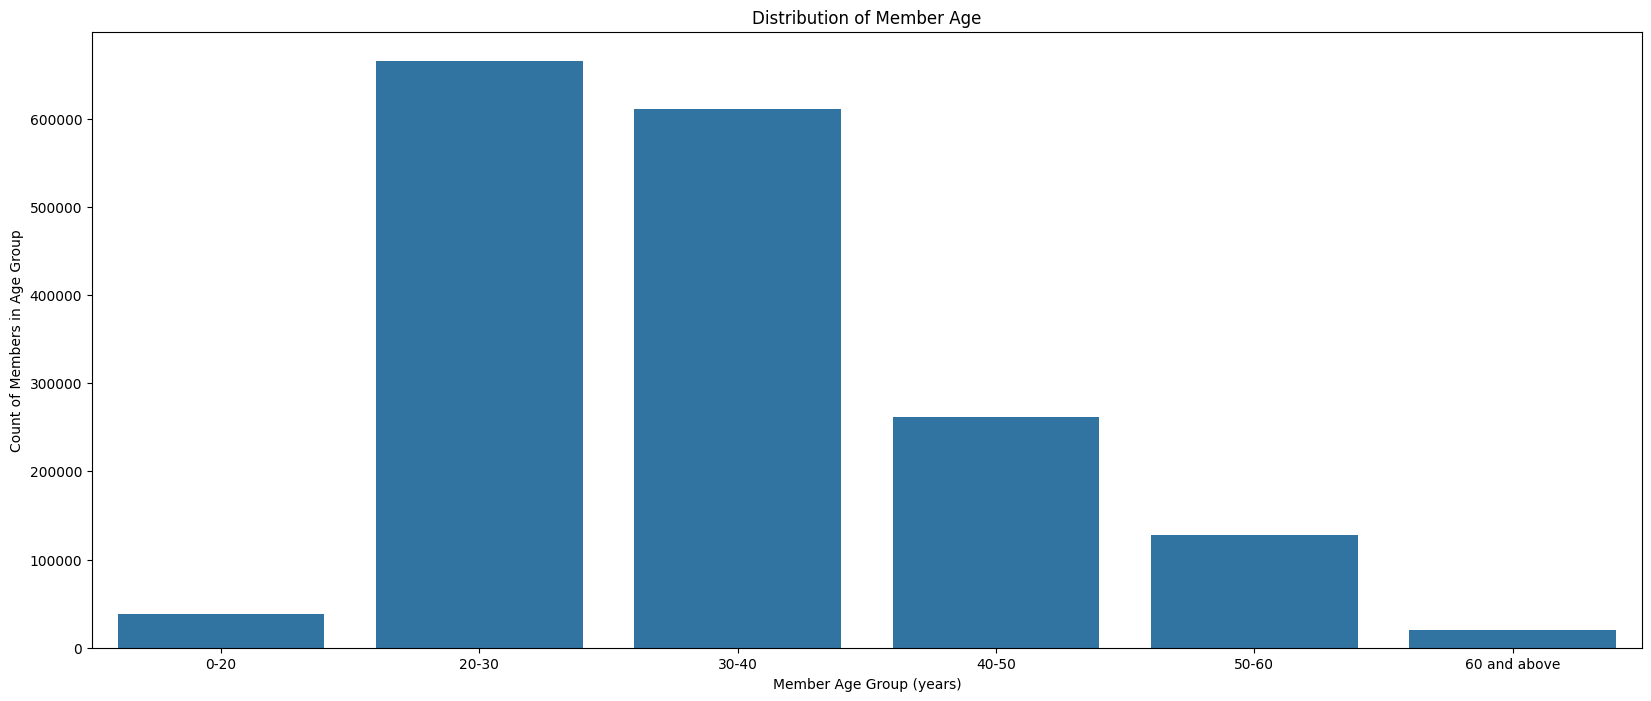

In [52]:
# Plot the distribution of the `member_age_group` using a bar chart
plt.figure(figsize=[20, 8])
sb.countplot(data=bike_data, x='member_age_group', color=base_color)
plt.xlabel('Member Age Group (years)')
plt.ylabel('Count of Members in Age Group')
plt.title('Distribution of Member Age');

Based on the analysis I conducted, I found that the age distribution of the riders ranged from 18 to 60 years old, with individuals above 65 years old considered as outliers. However, due to the presence of outliers in the age data, the analysis was restricted to individuals between the ages of 18 and 65. Within this age range, it was found that the most frequent riders fell into the 20-30 age group, implying that a significant portion of the bike share system users are young adults who are likely to be commuting to and from work or school, or using the system for leisure and recreation. This information is important for bike sharing service providers to consider when developing marketing strategies and making decisions related to service improvements and expansion.

### How many kilometers do the users ride across the age?
We can expect that the users who are between the ages of 20 and 40 ride the most kilometers, while the older users to have more flactuating kilometers.

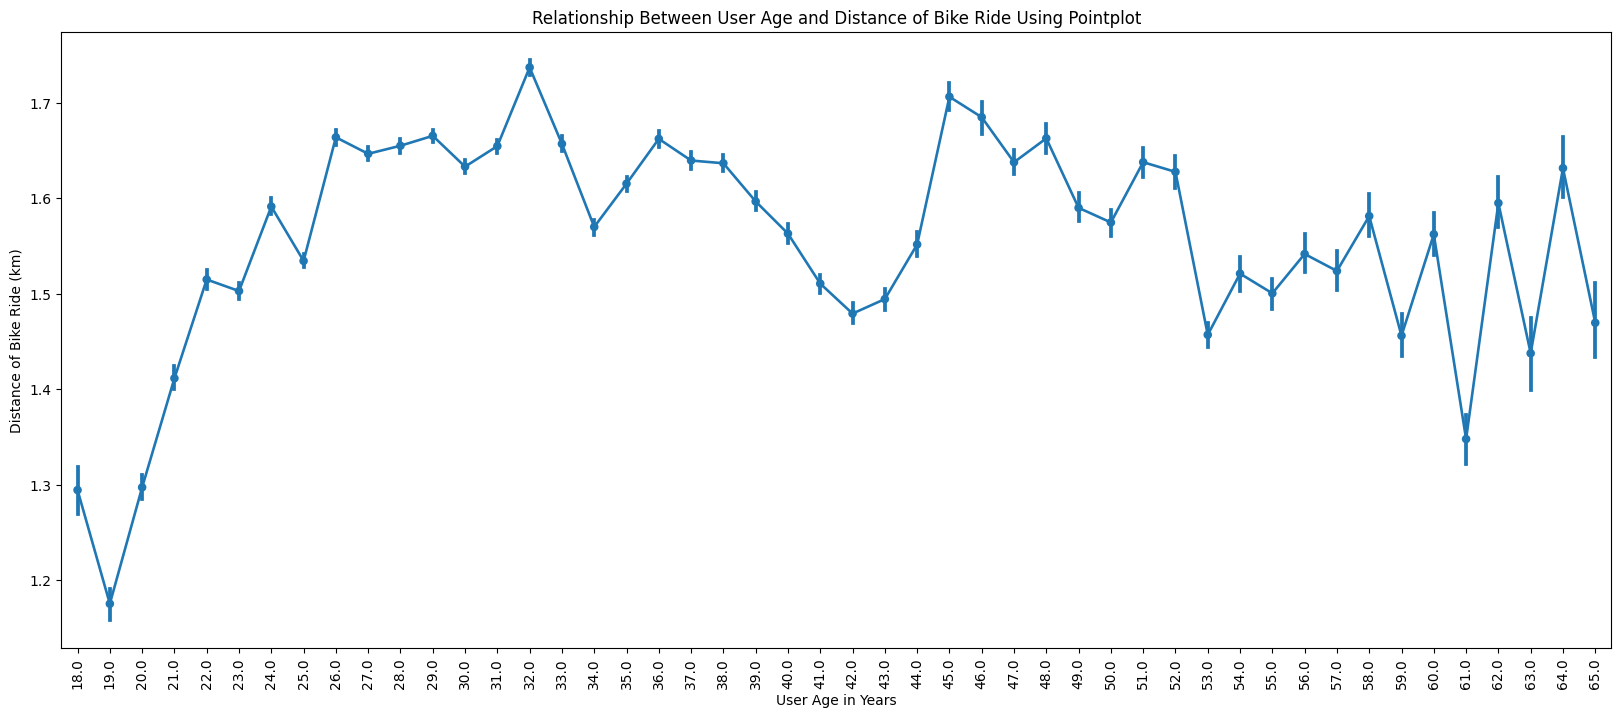

In [53]:
# pointplot of `member_age` and `distance`
plt.figure(figsize=(20, 8))
sb.pointplot(data=bike_data, x='member_age', y='distance', scale=.7, color=base_color)
plt.xlabel('User Age in Years')
plt.ylabel('Distance of Bike Ride (km)')
plt.title('Relationship Between User Age and Distance of Bike Ride Using Pointplot')
plt.xticks(rotation=90);

The analysis of the distribution of `member_age` and `distance` reveals that the majority of the oldest riders exhibit the largest variability in their distances traveled, spanning from the shortest to the longest distance. This observation could imply that the older riders might be more inclined to utilize the bike-sharing service for recreational purposes. Nonetheless, it is essential to acknowledge that the accuracy of the distance data might be limited by the `Haversine` formula's inability to consider the routes taken by the riders.

In [54]:
# Convert days of the week to ordered categorical type
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_days)
bike_data['day_of_week'] = bike_data['day_of_week'].astype(ordered_days)

### Duration of the rides in minutes throughout the week for each category of users
Interestingly, the duration of the rides for **customers** is higher than the duration of the rides for **subscribers**.

In [55]:
# convert the duration_sec to minutes
bike_data['duration_min'] = bike_data['duration_sec'] / 60

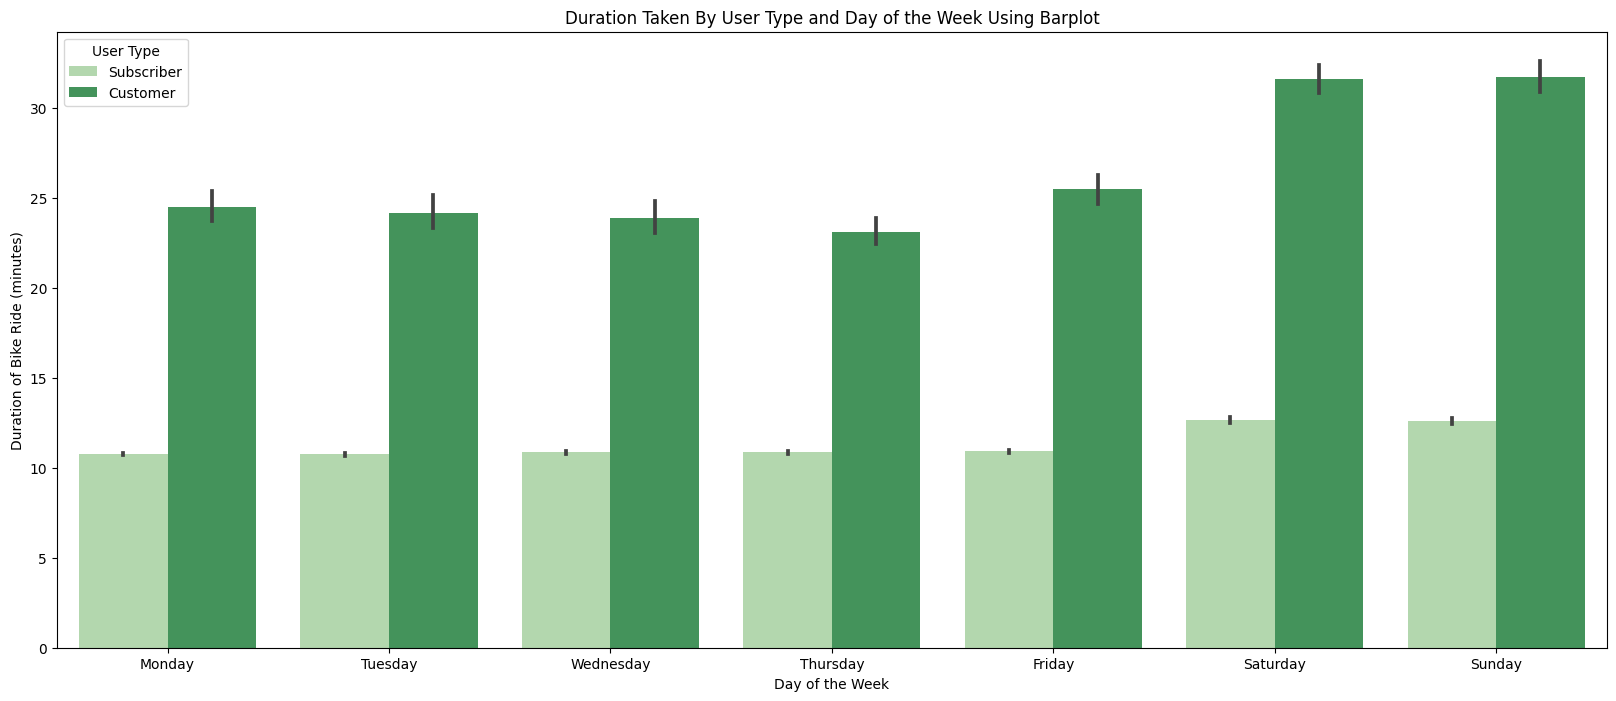

In [56]:
# barplot of duration_min and day_of_week, separated by user_type
plt.figure(figsize=(20, 8))
sb.barplot(data=bike_data, x='day_of_week', y='duration_min', hue='user_type', palette="Greens")
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Bike Ride (minutes)')
plt.title('Duration Taken By User Type and Day of the Week Using Barplot')
plt.legend(title='User Type');

The observation that the **customer** category has a higher duration of ride throughout the week than the **subscriber** category is intriguing. One possible explanation for this phenomenon is that customers may use the bike share system for leisure or tourism purposes, which could result in longer durations of ride time. On the other hand, subscribers may use the system primarily for daily commuting, which would result in shorter durations of ride time. This observation is important for bike sharing service providers to consider when developing marketing strategies and making decisions related to service improvements and expansion.

## Summary
> The data analysis reveals that the bike share system is primarily utilized for weekday commuting, especially during peak morning and evening hours, by young adults who are likely to be commuting to and from work or school. The most popular starting points are transportation hubs and mostly used by subscribers. Customers are more likely to use the bike-sharing system for short-term or occasional trips. Males are the primary users of the bike share system for commuting purposes, especially during peak hours, while females prefer stations located in the city center and popular tourist attractions.

> The age distribution of the riders ranged from 18 to 60 years old, with the majority falling into the 20-30 age group. The analysis of the distribution of member_age and distance reveals that the older riders might be more inclined to utilize the bike-sharing service for recreational purposes. Nonetheless, the accuracy of the distance data might be limited by the Haversine formula's inability to consider the routes taken by the riders.

> The analysis of the durations taken by riders shows that customers have a higher duration of ride throughout the week than subscribers. This observation could imply that customers use the bike share system for leisure or tourism purposes, resulting in longer durations of ride time.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [57]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 1206155 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 0.62ms
^C

Interrupted
